**Outline**

1. Topic Review
2. Case 1 - Earnings
3. Case 2 - Bike Sharing
4. Case 3 - Home Price

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
%pip install "https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl"
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:00


In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

## **Topic Review**
---

- Linear regression model with multiple predictors get estimated coefficient also from OLS estimate

$$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + ... +\beta_kx_k$$

- Estimated coefficient can be nonidentified when facing multicollinearity in the data
- Collinearity raise if, we have our linear combination of set of predictors are 0 or if we calculate the correlation is equal to 1
- We can face near collinearity if the set of predictors have correlation close to one
- Weighted Regression weight the residual sum of square (RSS), to estimate the coefficient. Weighted Regression can be used in these condition
  - The data need to infer the population
  - The data have duplicate observation
  - The data have unequal variances

  ## **Case 1 - Earnings**
---
- Let's continue to explore the yearly earning data from random sample of American Adults on survey data held in 1990
- We insist to know whether tall people can make higher income
- First, we need to load the data

### Load Data

In [4]:
earnings = pd.read_csv("earnings.csv")
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


### Fit Linear Regression - Using Height Variable
- Build the model using ols

In [5]:
# Create OLS model object
model = smf.ols("earn ~ height", earnings)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_height = print_coef_std_err(results)

- Visualize the data and the regression line

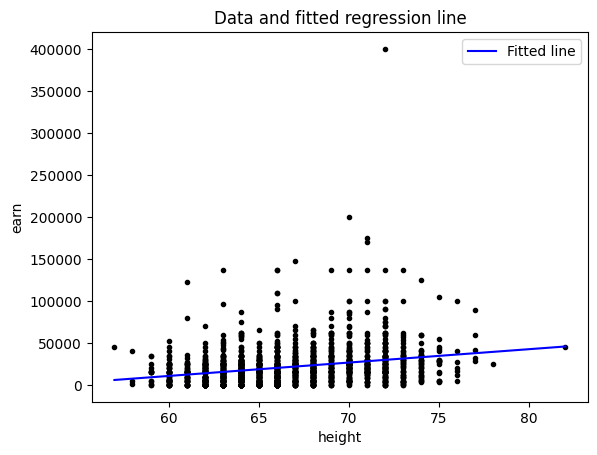

In [7]:
predictor = "height"
outcome = "earn"
data = earnings.copy()
results_ = results_height.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("earn")
plt.xlabel("height")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation

- Now we read the result of the model, and interpret each coefficient

In [8]:
results_height

,coef,std err
Intercept,-85027.312609,8860.650334
height,1594.959754,132.885243


$$\text{earn} = -85027 + 1595\text{height}$$

- The average earning of people that have 0 height is `-85027`. It doesn't make sense since no one have 0 inch height

- You can get more interpretable result by *centering the height* before insert the height into the model
- As a result, we can write another equivalent equation

### Center Heights

In [9]:
earnings["c_height"] = earnings["height"] - np.mean(earnings["height"])
earnings["c_height"]

,c_height
0,7.431167
1,-0.568833
2,-2.568833
3,-1.568833
4,-3.568833
...,...
1811,-5.568833
1812,-2.568833
1813,5.431167
1814,-3.568833


- `c_height` consist the difference of the data to their average
  - `c_height` is positive if a person have higher height than the average
  - `c_height` is negative if a person have lower height than the average
  - `c_height` is 0 if a person the average height

  Use `c_height` as predictor in the model

  

In [10]:
# Create OLS model object
model = smf.ols("earn ~ c_height", earnings)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_c_height = print_coef_std_err(results)
results_c_height

,coef,std err
Intercept,21147.296256,509.052432
c_height,1594.959754,132.885243


### Coefficient Interpretation

$$\text{earn} = 21147 + 1595\text{c_height}$$
- The interpretation of intercept is the average of earning when the `c_height` is zero. `c_height` is zero when a person have the average height
- So the better interpretation of intercept by centering the predictor is, the average earning of people tha have *average height* is `$21147`
- The coefficient of `c_height` is the same as the coefficient we have without centering the predictor
- The interpretation of coefficient is the difference in earning between two people whose have one point different in height, is `$1595`, with the people whose taller have higher earning

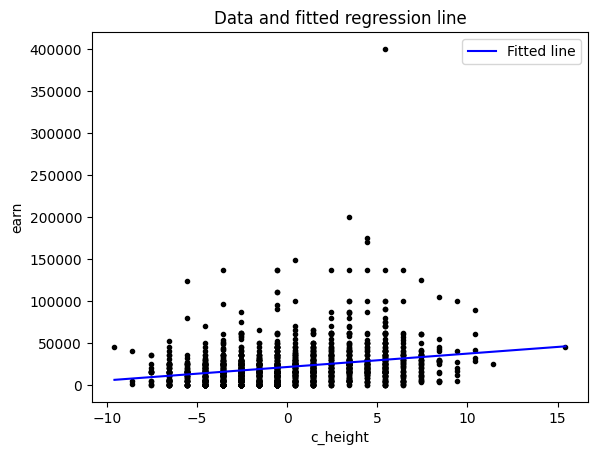

In [11]:
predictor = "c_height"
outcome = "earn"
data = earnings.copy()
results_ = results_c_height.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("earn")
plt.xlabel("c_height")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The regression line we have the same slope with the line we fit before centering the height

- The linear regression of earnings on height yielded a positive slope for height, implying that taller adults have higher earnings. However it seemed possible that this positive slope was explained by the other variable. Think about whether there is some other variable that offers a different explanation for the regression line.
  - For example, we might think men are taller than women and tend to make more money
  - If higher earn differ from lower earn in sex better than height, then these other differences might offer a better explanation in earn
- The presence of these other variable are called a lurking variable
- Let's demonstrate whether a male have higher earn a woman in the same height

In [12]:
model = smf.ols('earn ~ c_height + male',earnings)
results = model.fit()
print_coef_std_err(results)

,coef,std err
Intercept,17195.175431,741.514866
c_height,646.959842,185.228571
male,10632.668766,1468.300256


### Coefficient Interpretation
$$\text{earn} = 17195 + 647\text{c_height} + 10633\text{male}$$

- The coefficient of 10633 on male tells us that, in these data, comparing a man to a woman of the same height, the man will be predicted to be $10633 higher earn

- We can also explain how to interpret this by considering men and women separately. For men and women, the sex variable is 1 and 0, and so the regression lines are,

$$\text{sex} = 1, \text{ earn} = 27828 + 647\text{c_height}$$
$$\text{sex} = 0, \text{ earn} = 17196 + 647\text{c_height}$$

- Compared to the previous regression that did not include sex as a predictor, the coefficient for height has decreased 1594 to 646 (this makes sense, since height are explained by sex) but is still positive

### Add indicator variables for multiple levels of a categorical predictor

- Next, we add Ethnicity variable, and see how we interpret the model if we have multiple levels of a categorical predictor


In [13]:
model = smf.ols('earn ~ c_height + male + C(ethnicity)',earnings)
results = model.fit()

print_coef_std_err(results)

,coef,std err
Intercept,13403.513044,1680.120815
C(ethnicity)[T.Hispanic],-1743.302743,2636.139088
C(ethnicity)[T.Other],4561.854974,3816.009171
C(ethnicity)[T.White],4440.030697,1683.332755
c_height,584.767413,186.458224
male,11018.159181,1473.177391


- In OLS function took the Black as baseline category against which all other groups. It’s automatically chosen alphabetically, so the Black is the first category as baseline
- The baseline is used to interpret other categorical coefficient comparing to the baseline category

### Coefficient Interpretation

- Intercept : The expected earn of a black male that have average height is $13404

- Coefficient in `Hispanic`: Comparing a Hispanic person and a Black person, with the same sex and height, the predicted earn on a White person is $1743 lower on average

- Coefficient in `Other`: Comparing a Other person and a Black person, with the same sex and height, the predicted earn on a White person is $4562 higher on average

- Coefficient in `White`: Comparing a White person and a Black person, with the same sex and height, the predicted earn on a White person is $4440 higher on average

- Coefficient in `c_height`: Comparing a Black person with the same sex, but differ in 1 inch height, the predicted earn of taller person is $584 higher on average.

- Coefficient in `male` : Comparing a Black person with the same height, but differ in sex, the predicted weight of male person is $11018 higher than the female person.

- You can choose the baseline category by setting the levels using `Treatment(reference="...")`


- For example, `model = smf.ols('weight ~ c_height + male + C(ethnicity, Treatment(reference="White"))',earnings)`

## **Case 2 - Bike Sharing**
---

- Given data of bike rental in Seoul, we demonstrate regression model of the rental count based on the temperature and other variable that have near collinearity with the temperature

### Load Data

In [16]:
bikeshare = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
bikeshare.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- Use LabelEncoder to convert the some variables into numeric

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform variables
bikeshare["Holiday"] = LabelEncoder().fit_transform(bikeshare["Holiday"])
bikeshare["Functioning Day"] = LabelEncoder().fit_transform(bikeshare["Functioning Day"])

In [18]:
col = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Holiday', 'Functioning Day']

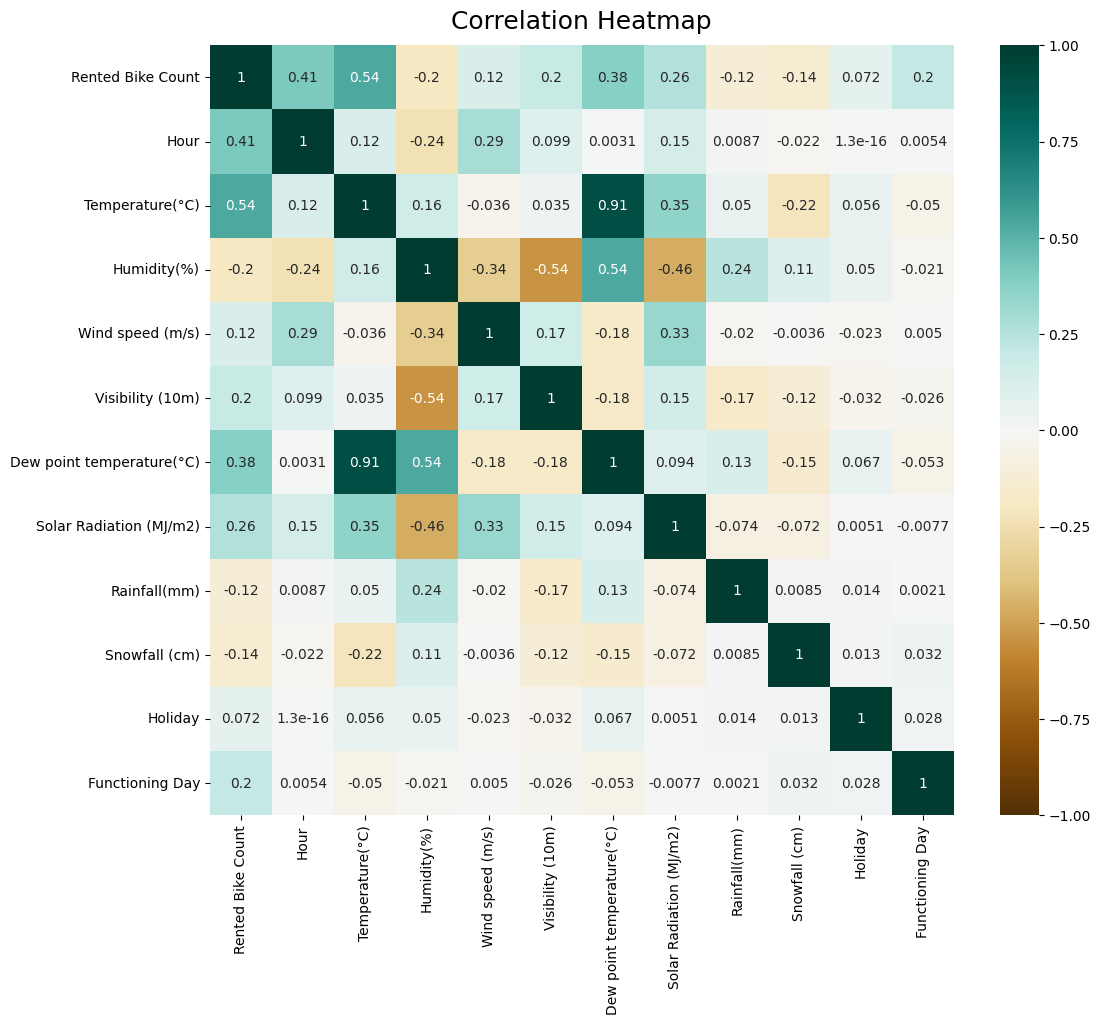

In [19]:
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(bikeshare[col].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- The Temperature variable have 0.91 correlation with the Dew point temperature(°C)

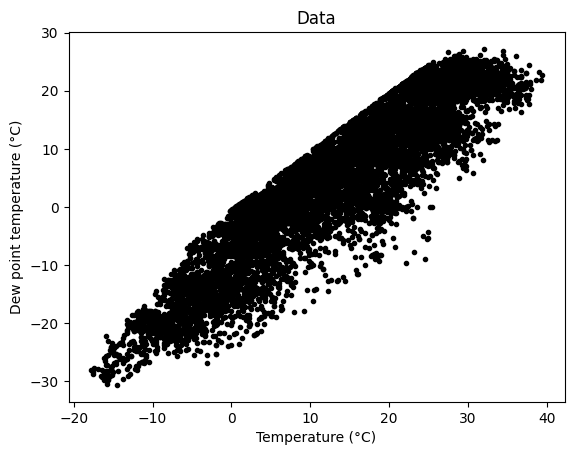

In [20]:
import matplotlib.pyplot as plt

x = bikeshare["Temperature(°C)"]
y = bikeshare["Dew point temperature(°C)"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("Temperature (°C)")
plt.ylabel("Dew point temperature (°C)")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- From the visualization, we also se they have strong positive linear correlation
- Let's see how this affect the linear regression we build
### Fit Linear Regression
- Rename the columns to use it in the ols formula easily



In [21]:
bikeshare= bikeshare.rename(columns={'Rented Bike Count':'RentedBikeCount',
                          'Temperature(°C)':'Temperature',
                          'Humidity(%)':'Humidity',
                          'Dew point temperature(°C)':'DewPointTemp'})

In [22]:
# Create OLS model object
model = smf.ols("RentedBikeCount ~ Temperature", bikeshare)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_temp = print_coef_std_err(results)